# TMDB Movies Project

### Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv("TMDB_movies.csv")

### Counting nulls

In [4]:
null_df = df.isnull() # truth table
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
notnull_df = df.notnull()
notnull_df.sum()

budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
dtype: int64

### Identifying the number of nulls and putting them into a data frame

In [6]:
def null_vals(df):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = df.isnull().sum() # How many nulls in each column
    total_cnt = len(df) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals, columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [7]:
null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


### Dropping the nulls

In [8]:
df.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['release_date', 'runtime', 'overview'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

null_vals(df)

,null,percent
homepage,3087,64.326
tagline,840,17.504
budget,0,0.000
release_date,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000


### Filling the nulls

In [9]:
df['homepage'].fillna(
    value = 'Not available', # our value
    method = None, # We're using a pre-determined value, not backfilling/padding
    inplace = True # Have the changes take place
)

df['tagline'].fillna(
    value = 'Not available', ## our value
    method = None, # We're using a pre-determined value, not backfilling/padding
    inplace = True # Have the changes take place
)

# Average Revenue Over The Years

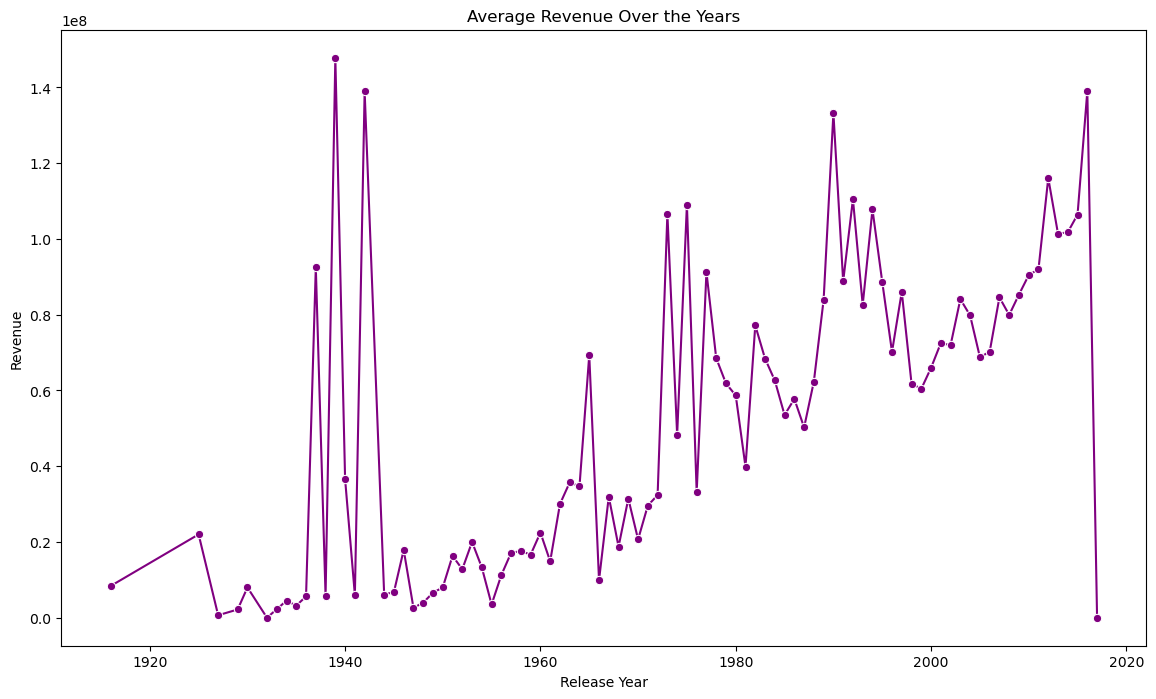

In [10]:
# Extracting the columns
year_and_revenue = df[['release_date', 'revenue']].copy()

# Converting release date to datetime format and extract the year
year_and_revenue['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Grouping the data by release year and calculating the mean revenue for each year
mean_revenue_by_year = year_and_revenue.groupby('release_year')['revenue'].mean().reset_index()

# Setting the graph size and ploting the data
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='revenue', data=mean_revenue_by_year, marker='o', color='purple')

# Setting the title and axis labels
plt.title('Average Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()

### Keypoint 1: Large spike in revenue in 1939, right at the start of the Second World War

# Revenue by Genre

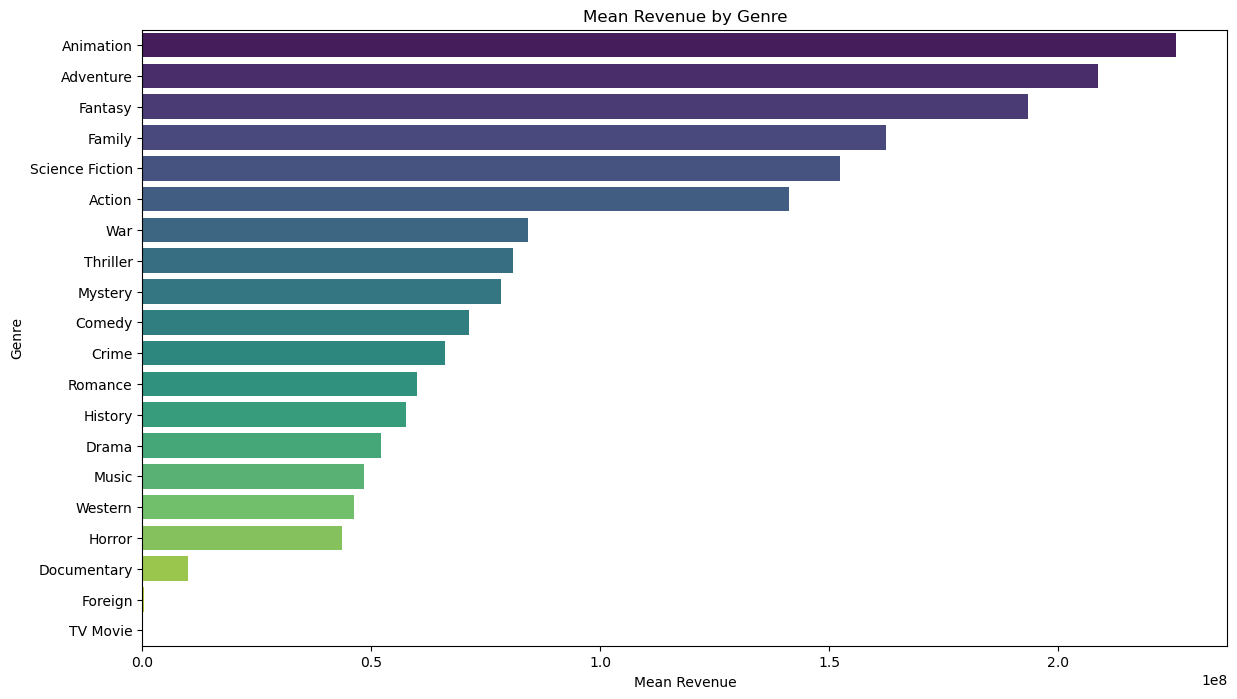

In [11]:
# Alex's function to retrieve the genres and put them into a list
def extract_genres(film):
    ''' Take a single film's genres and make them into a comma-separated string '''
    film = ast.literal_eval(film)  # make sure it's a list!
    
    genres = [x['name'] for x in film]  # Get a list of all names
    
    return genres  # Return the list of genres

# Extracting the columns
genres_and_revenue = df[['genres', 'revenue']].copy()

# Applying the extract_genres function to create a new column 'genre'
genres_and_revenue['genre_list'] = genres_and_revenue['genres'].apply(extract_genres)

# Exploding the 'genre_list' column to have one row for each genre
exploded_genres_and_revenue = genres_and_revenue.explode('genre_list')

# Grouping the data by 'genre_list' and calculate the mean revenue for each genre
mean_revenue_by_genre = exploded_genres_and_revenue.groupby('genre_list')['revenue'].mean().reset_index()

# Sorting the genres by mean revenue
mean_revenue_by_genre = mean_revenue_by_genre.sort_values(by='revenue', ascending=False)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='revenue', y='genre_list', data=mean_revenue_by_genre, palette='viridis')
plt.title('Mean Revenue by Genre')
plt.xlabel('Mean Revenue')
plt.ylabel('Genre')
plt.show()

### Keypoint 2: Many genres such as war, history, and drama pulled in a low revenue whilst 
### also getting high ratings. See graph below.

# Ratings by Genre

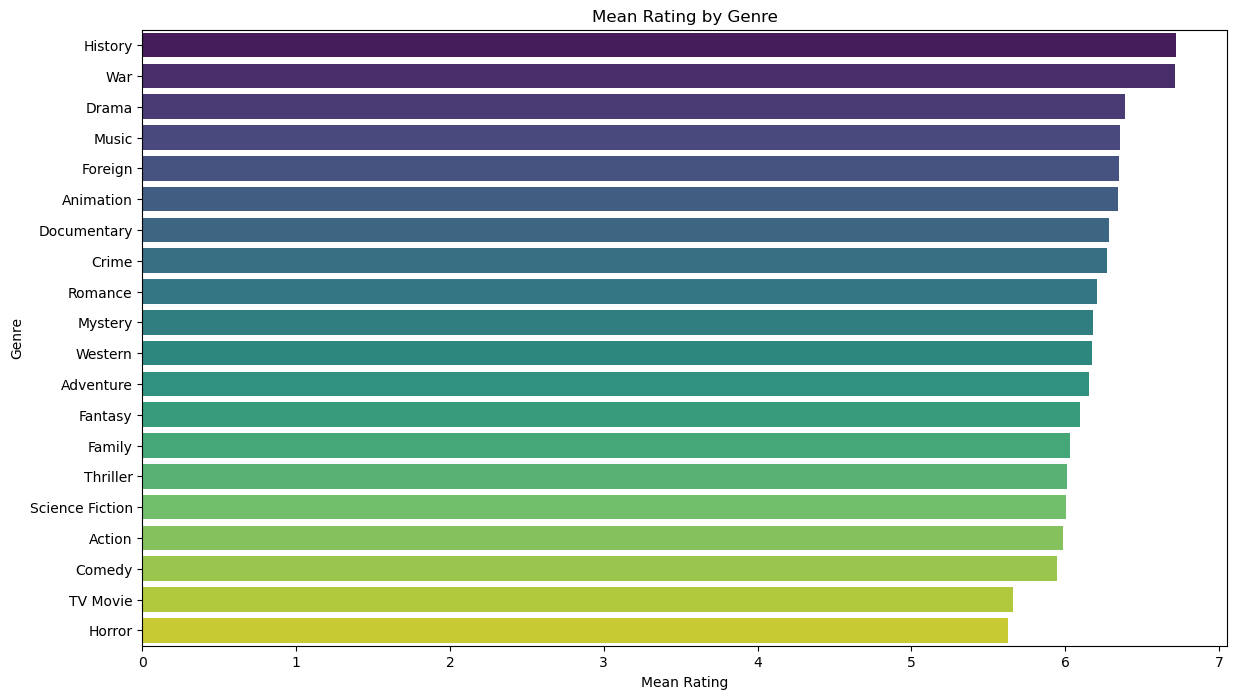

In [84]:
# Alex's function to retrieve the genres and put them into a list
def extract_genres(film):
    ''' Take a single film's genres and make them into a comma-separated string '''
    film = ast.literal_eval(film)  # make sure it's a list!
    
    genres = [x['name'] for x in film]  # Get a list of all names
    
    return genres  # Return the list of genres

# Extracting the relevant columns and copy the df to make a new df
genres_and_ratings = df[['genres', 'vote_average']].copy()

# Applying the extract_genres function to create a new column 'genre'
genres_and_ratings['genre_list'] = genres_and_ratings['genres'].apply(extract_genres)

# Exploding the 'genre_list' column to have one row for each genre
exploded_genres_and_ratings = genres_and_ratings.explode('genre_list')

# Grouping the data by 'genre_list' and calculate the mean revenue for each genre
mean_ratings_by_genre = exploded_genres_and_ratings.groupby('genre_list')['vote_average'].mean().reset_index()

# Sorting the genres by mean revenue
mean_ratings_by_genre = mean_ratings_by_genre.sort_values(by='vote_average', ascending=False)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='vote_average', y='genre_list', data=mean_ratings_by_genre, palette='viridis')
plt.title('Mean Rating by Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.show()

### History, war and drama received the highest ratings while other high-performing genres
### that pulled in a lot of revenue didn't get rated so highly: action, science fiction

# Revenue vs Budget

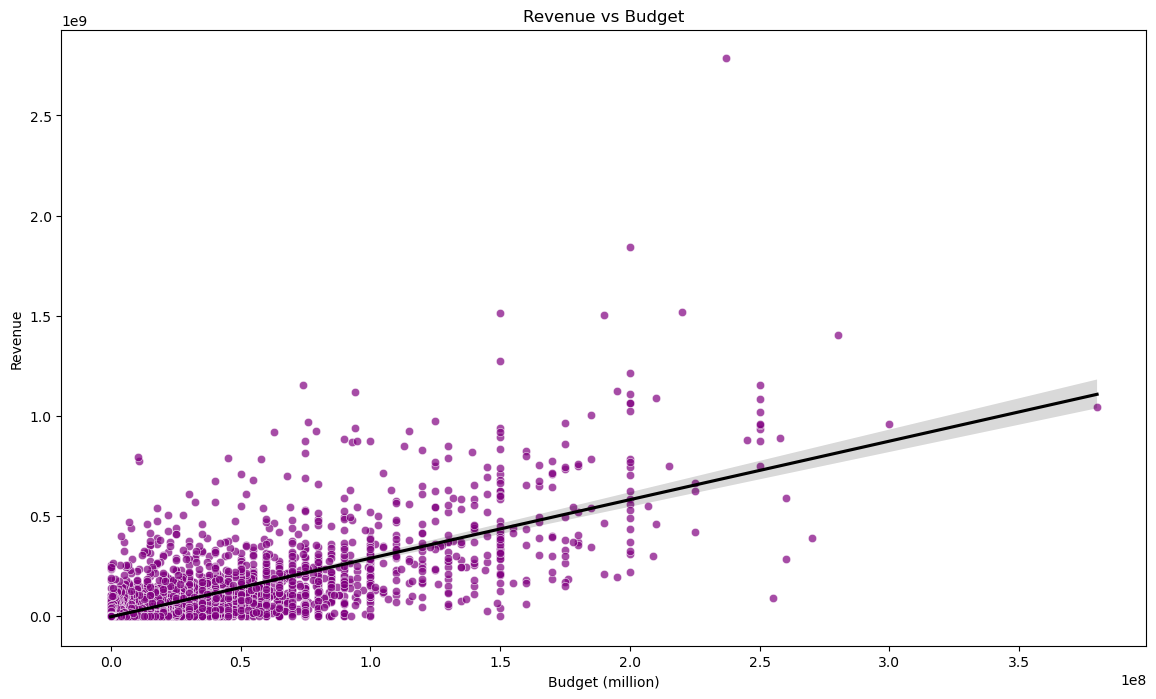

In [85]:
# Extracting the relevant columns
budget_and_revenue = df[['budget', 'revenue']].copy()

# Plotting revenue against budget
plt.figure(figsize=(14, 8))
sns.scatterplot(x='budget', y='revenue', data=budget_and_revenue, color='purple', alpha=0.7)
sns.regplot(x='budget', y='revenue', data=budget_and_revenue, scatter_kws={'alpha':0.0}, line_kws={'color':'black'})
plt.title('Revenue vs Budget')
plt.xlabel('Budget (million)')
plt.ylabel('Revenue')
plt.show()

# Calculating the Pearson correlation and p_value coefficient using numpy
correlation_coefficient = np.corrcoef(budget_and_revenue['budget'], budget_and_revenue['revenue'])[0, 1]

### Correlation coefficient = 0.73

# Revenue vs Rating

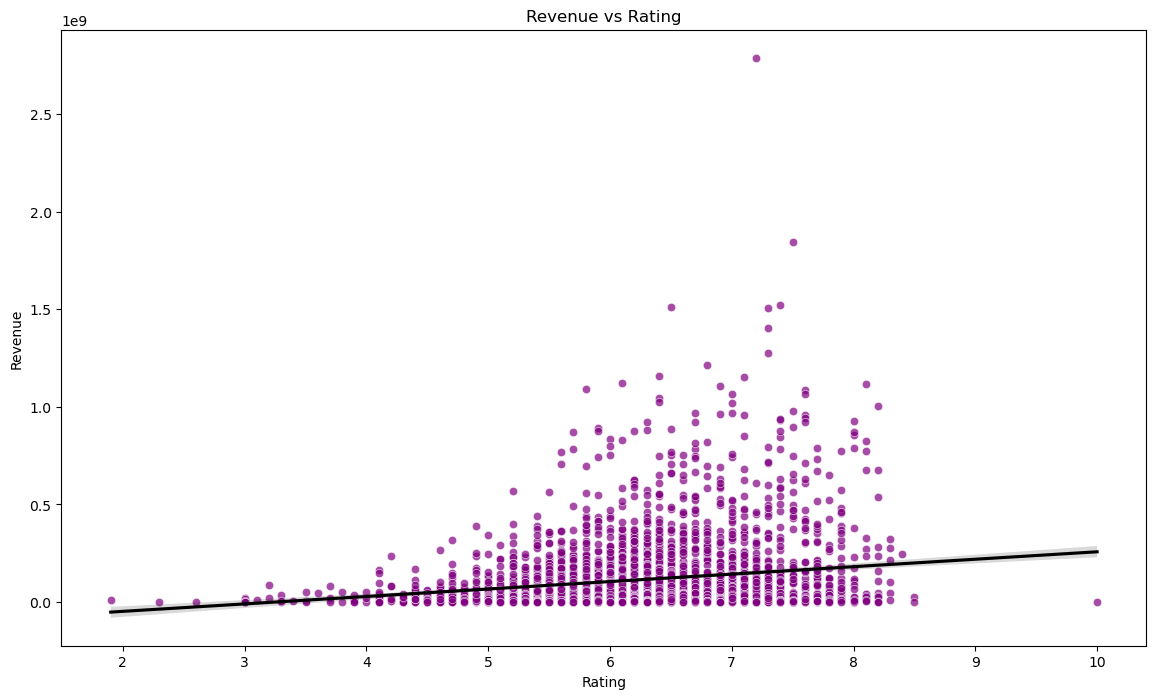

0.18057888768069225


In [86]:
# Extracting the relevant columns
revenue_and_rating = df[['vote_average', 'revenue']].copy()

# Dropping rows with 0 runtime or revenue
revenue_and_rating = revenue_and_rating[(revenue_and_rating['revenue'] != 0) & (revenue_and_rating['vote_average'] != 0)]

# Plotting revenue against budget
plt.figure(figsize=(14, 8))
sns.scatterplot(x='vote_average', y='revenue', data=revenue_and_rating, color='purple', alpha=0.7)
sns.regplot(x='vote_average', y='revenue', data=revenue_and_rating, scatter_kws={'alpha':0.0}, line_kws={'color':'black'})
plt.title('Revenue vs Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

# Calculating the Pearson correlation and p_value coefficient using numpy
correlation_revenue_and_rating = np.corrcoef(revenue_and_rating['vote_average'], revenue_and_rating['revenue'])[0, 1]
print(correlation_revenue_and_rating)

### Correlation Coefficient = 0.18

# Revenue vs Runtime

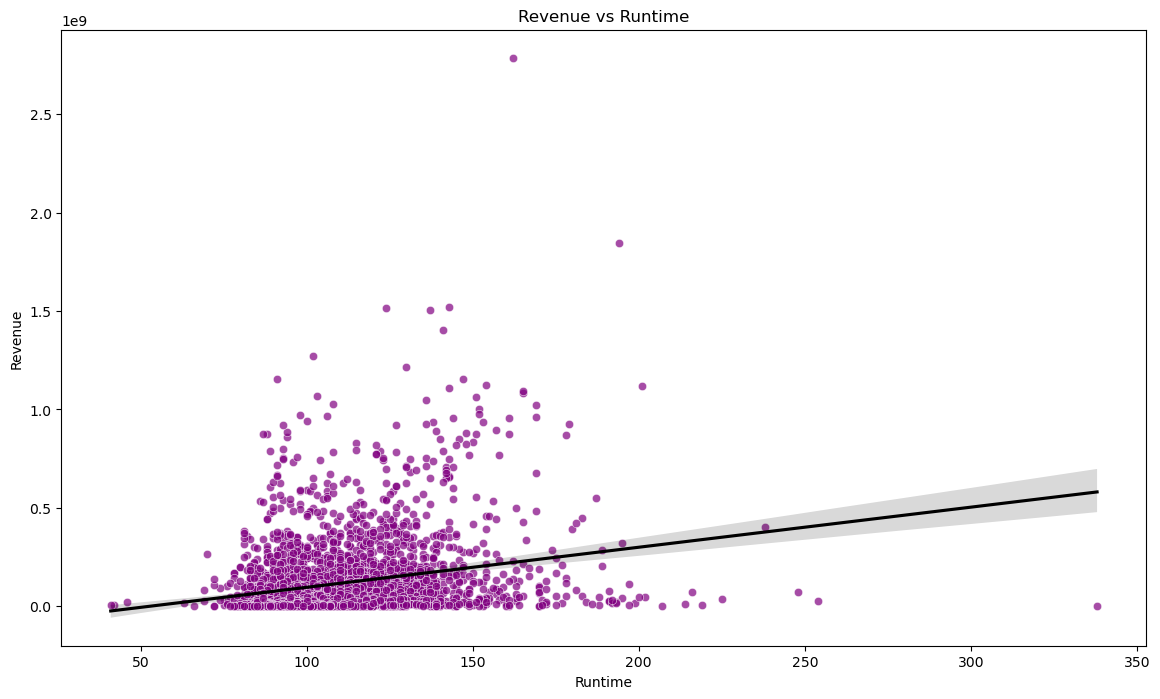

In [87]:
# Extracting the relevant columns and copy the df
runtime_and_revenue = df[['runtime', 'revenue']].copy()

# Dropping rows with 0 runtime or revenue
runtime_and_revenue = runtime_and_revenue[(runtime_and_revenue['runtime'] != 0) & (runtime_and_revenue['revenue'] != 0)]

# Plotting revenue against runtime
plt.figure(figsize=(14, 8))
sns.scatterplot(x='runtime', y='revenue', data=runtime_and_revenue, color='purple', alpha=0.7)
sns.regplot(x='runtime', y='revenue', data=runtime_and_revenue, scatter_kws={'alpha':0.0}, line_kws={'color':'black'})
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

# Calculating the Pearson correlation and p_value coefficient using numpy
runtime_and_revenue_correlation = np.corrcoef(runtime_and_revenue['runtime'], runtime_and_revenue['revenue'])[0, 1]

### Correlation Coefficient = 0.23

# Rating vs Runtime

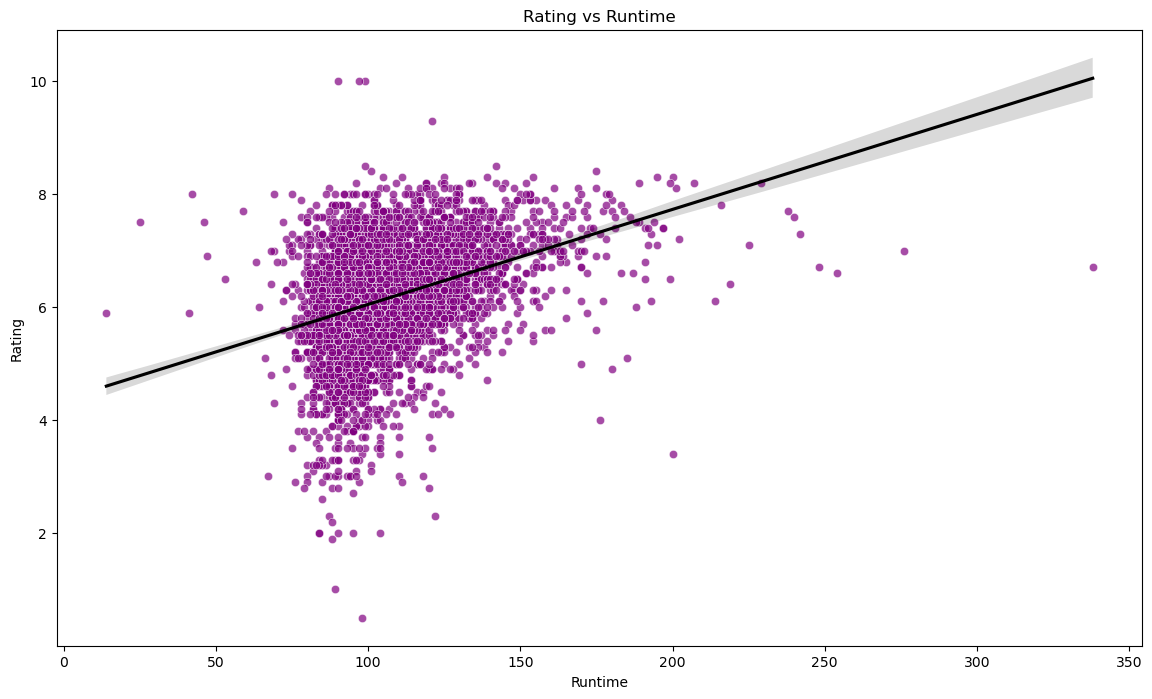

In [88]:
# Extracting the relevant columns and copy the df
runtime_and_rating = df[['runtime', 'vote_average']].copy()

# Dropping rows with 0 runtime or 0 vote_average
runtime_and_rating = runtime_and_rating[(runtime_and_rating['runtime'] != 0) & (runtime_and_rating['vote_average'] != 0)]

# Plotting revenue against runtime
plt.figure(figsize=(14, 8))
sns.scatterplot(x='runtime', y='vote_average', data=runtime_and_rating, color='purple', alpha=0.7)
sns.regplot(x='runtime', y='vote_average', data=runtime_and_rating, scatter_kws={'alpha':0.0}, line_kws={'color':'black'})
plt.title('Rating vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.show()

# Calculating the Pearson correlation and p_value coefficient using numpy
runtime_rating_correlation = np.corrcoef(runtime_and_rating['runtime'], runtime_and_rating['vote_average'])[0, 1]

### Correlation Coefficient = 0.36

# Correlation Heatmap

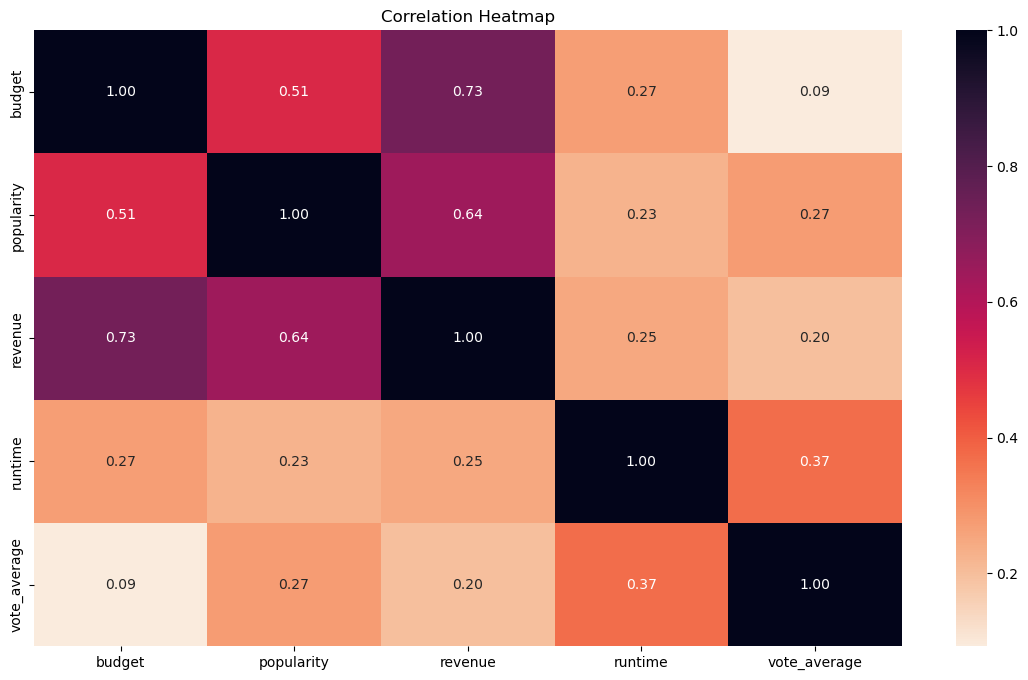

In [89]:

plt.figure(figsize=(14, 8))

# Selecting the desired columns
selected_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']

# Calculating the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, cmap='rocket_r', annot=True, fmt=".2f")

# Setting the title
plt.title('Correlation Heatmap')

plt.show()

### Moderate-strong correlations found between budget and revenue, budget and 
### popularity, and popularity and revenue

# Best Value Film (Rating to Budget Ratio)

In [17]:
# Getting hold of the 'best value film'

# Copying the df
best_value_df = df.copy()

# Filtering the films with a budget > 1 million
best_value_df = best_value_df[best_value_df['budget'] > 1000000]

# Creating the new column 'vote_to_budget_ratio' and performing the equation which gives us the ratio
best_value_df['vote_to_budget_ratio'] = (best_value_df['vote_average'] / best_value_df['budget']) * 1000000

# Sorting the DataFrame by 'vote_to_budget_ratio' in descending order
best_value_df = best_value_df.sort_values(by='vote_to_budget_ratio', ascending=False).head(10)

# Selecting the top ten films based on the vote_to_budget_ratio
best_value_df[['title', 'budget', 'revenue', 'vote_average', 'vote_to_budget_ratio']].head(10)

# Finding the film with the highest vote_to_budget_ratio
best_value_film = best_value_df['vote_to_budget_ratio'].idxmax()

# Retrieving the entire row for that film
best_value_film = best_value_df.loc[best_value_film]
print(best_value_film[['title', 'genres', 'budget', 'popularity', 'revenue', 'vote_average', 'vote_to_budget_ratio']])


title                    The Good, the Bad and the Ugly
genres                  [{"id": 37, "name": "Western"}]
budget                                          1200000
popularity                                    88.377076
revenue                                         6000000
vote_average                                        8.1
vote_to_budget_ratio                               6.75
Name: 4302, dtype: object


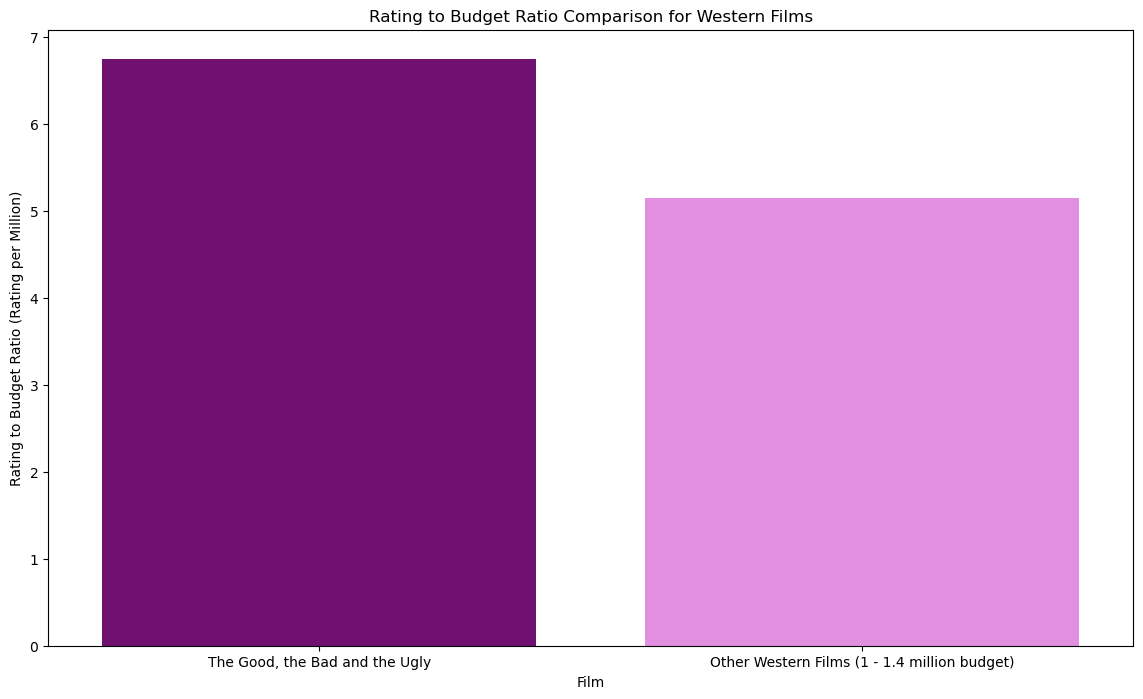

In [18]:
# Alex's function to retrieve the genres and put them into a list
def extract_genres(film):
    ''' Take a single film's genres and put them into a list '''
    film = ast.literal_eval(film)  # make sure it's a list!
    
    genres = [x['name'] for x in film]  # Get a list of all names
    
    return genres  # Return the list of genres

# Copying the df
westerns_df = df.copy()

# Filtering the western films with a budget > 1 million
westerns_df = westerns_df[(westerns_df['budget'] >= 1000000) & (westerns_df['budget'] <= 1400000)]

# Applying the extract_genres function to create a new column 'genre_list'
westerns_df['genre_list'] = westerns_df['genres'].apply(extract_genres)

# Filtering Western films using the extracted genres
westerns_df = westerns_df[westerns_df['genre_list'].apply(lambda genres: 'Western' in genres)]

# Calculating the aggregated 'vote_to_budget_ratio' for all other Western films
other_western_films_ratio = (westerns_df['vote_average'] / westerns_df['budget']).mean() * 1000000

# Creating a DataFrame for the bar plot
plot_data = pd.DataFrame({
    'Film': [best_value_film['title'], 'Other Western Films (1 - 1.4 million budget)'],
    'Rating_to_Budget_Ratio': [best_value_film['vote_to_budget_ratio'], other_western_films_ratio]
})

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Film', y='Rating_to_Budget_Ratio', data = plot_data, palette=['purple', 'violet'])
plt.title('Rating to Budget Ratio Comparison for Western Films')
plt.ylabel('Rating to Budget Ratio (Rating per Million)')
plt.show()



### High rating-to-budget ratio for The Good, The Bad and The Ugly. Significantly higher than
### other westerns

# Rating To Budget Ratio (vs all other films)

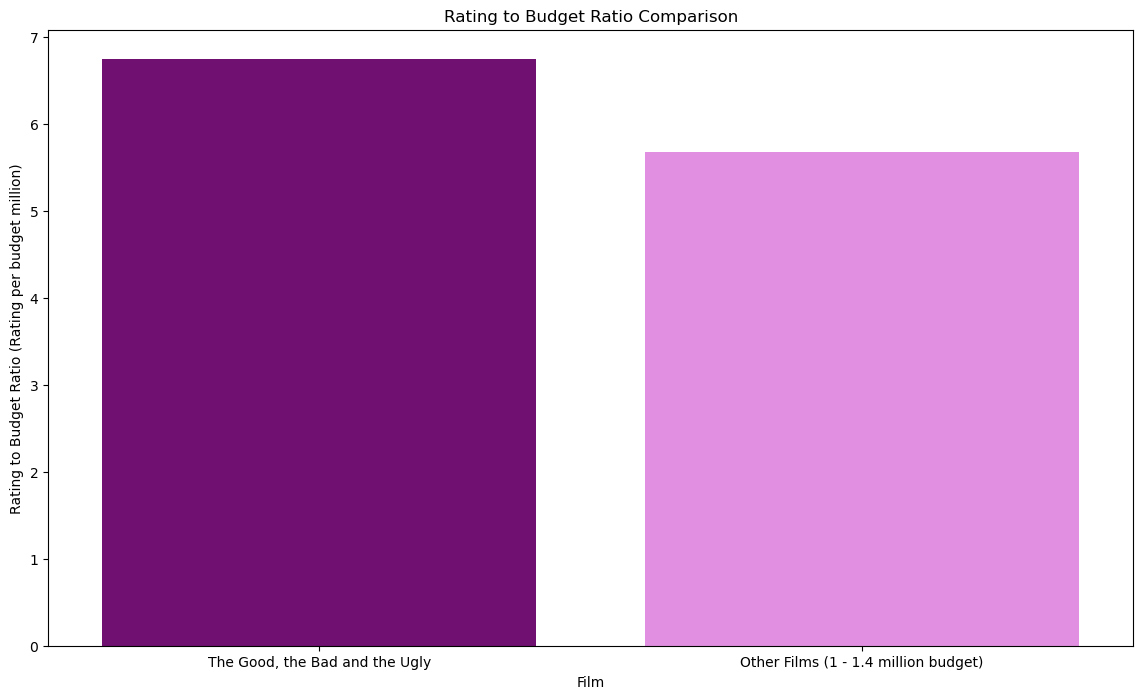

In [20]:

# Copying the df
copy_df = df.copy()

# Filtering the films with a budget > 1 million
copy_df = copy_df[(copy_df['budget'] >= 1000000) & (copy_df['budget'] <= 1400000)]

# Calculating the aggregated 'vote_to_budget_ratio' for all other films
copy_df_ratio = (copy_df['vote_average'] / copy_df['budget']).mean() * 1000000

# Creating a DataFrame for the bar plot
plot_data = pd.DataFrame({
    'Film': [best_value_film['title'], 'Other Films (1 - 1.4 million budget)'],
    'Vote_to_Budget_Ratio': [best_value_film['vote_to_budget_ratio'], copy_df_ratio]
})

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Film', y='Vote_to_Budget_Ratio', data = plot_data, palette=['purple', 'violet'])
plt.title('Rating to Budget Ratio Comparison')
plt.ylabel('Rating to Budget Ratio (Rating per budget million)')
plt.show()

### The comparison is a little closer when compared to other films rather than just westerns

# Revenue To Budget Ratio

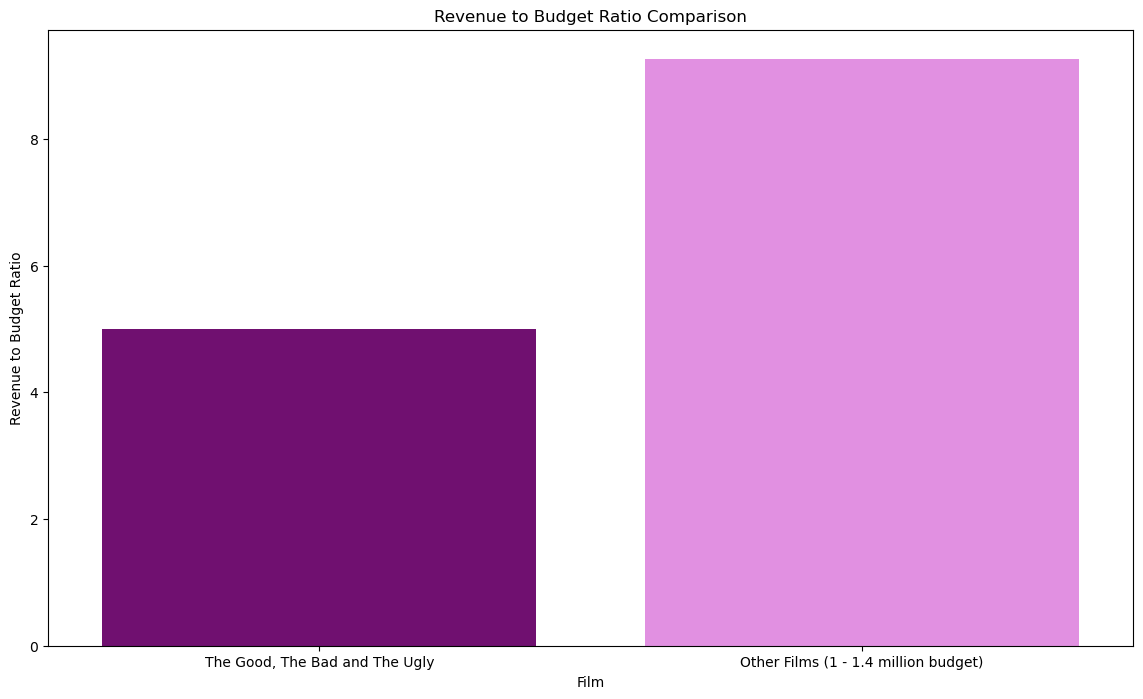

In [93]:
other_films_df = df.copy()

# Filtering films with a budget of between 100000 and 140000
other_films_df = other_films_df.query('1000000 <= budget <= 1400000')

# Calculating the aggregated 'revenue_to_budget_ratio' for all other films
other_films_revenue_ratio = (other_films_df['revenue'] / other_films_df['budget']).mean()

# Calculating the revenue-budget ratio for best value film
best_value_film_revenue_ratio = (best_value_film['revenue'] / best_value_film['budget'])

# Creating a DataFrame for the barplot
plot_data_revenue = pd.DataFrame({
    'Film': ['The Good, The Bad and The Ugly', 'Other Films (1 - 1.4 million budget)'],
    'Revenue_to_Budget_Ratio': [best_value_film_revenue_ratio, other_films_revenue_ratio]
})

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Film', y='Revenue_to_Budget_Ratio', data=plot_data_revenue, palette=['purple', 'violet'])
plt.title('Revenue to Budget Ratio Comparison')
plt.ylabel('Revenue to Budget Ratio')
plt.show()

### Despite The Good, The Bad, and The Ugly's high ratings, it did not perform well in terms
### of revenue when compared to other films with similar budgets

# Biggest Flop

### Lowest rated film with a top 100 revenue

In [23]:
# Getting hold of the biggest flop

# Copying the df
biggest_flop_df = df.copy()

# Filtering for the top 100 films yb revenue
biggest_flop_df = biggest_flop_df.nlargest(100, 'revenue')

# # Creating the new column 'revenue_to_rating_ratio' and performing the equation which gives us the ratio
# biggest_flop_df['revenue_to_rating_ratio'] = (biggest_flop_df['revenue'] / biggest_flop_df['vote_average'])

# Sorting the DataFrame by 'vote_to_budget_ratio' in descending order
biggest_flop_df = biggest_flop_df.sort_values(by='vote_average', ascending=True)

# Finding the film with the lowest revenue to rating ratio
biggest_flop_film = biggest_flop_df['vote_average'].idxmin()

# Retrieving the entire row for that film
biggest_flop_film = biggest_flop_df.loc[biggest_flop_film]
biggest_flop_film[['title', 'genres', 'budget', 'revenue', 'popularity', 'vote_average']]



title                                                        2012
genres          [{"id": 28, "name": "Action"}, {"id": 12, "nam...
budget                                                  200000000
revenue                                                 769653595
popularity                                              45.274225
vote_average                                                  5.6
Name: 59, dtype: object

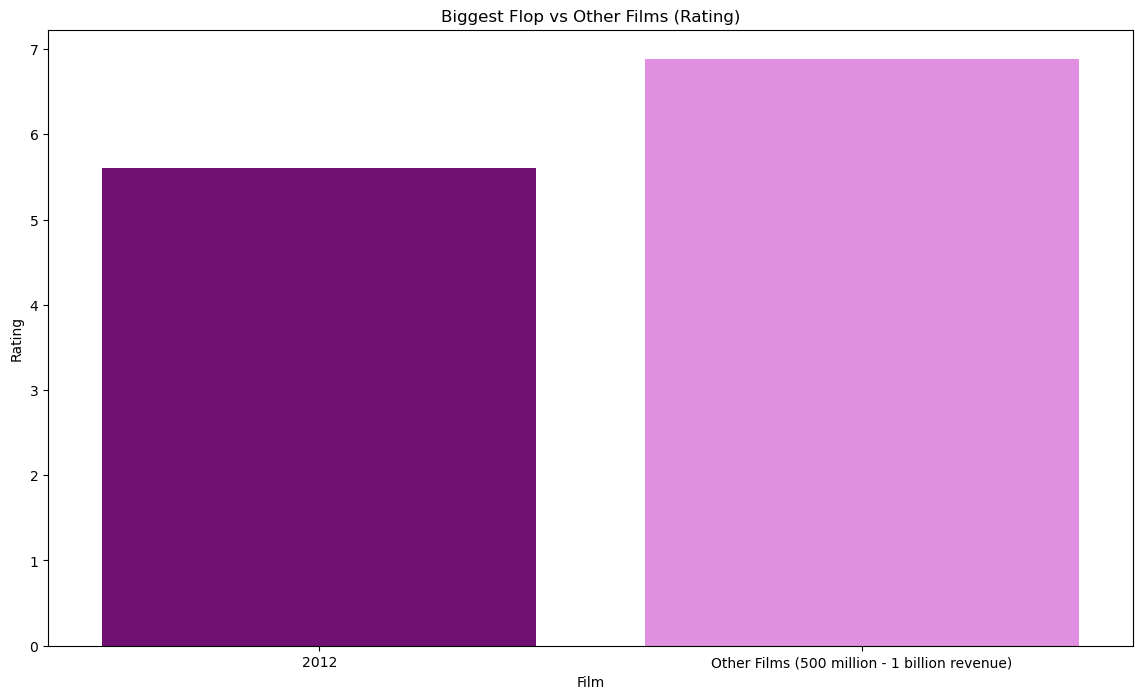

In [95]:
# Filtering films with a revenue between 500 million and 1 billion
other_films_df = df.query('500000000 <= revenue <= 1000000000')

# Creating a DataFrame for the barplot
plot_data = pd.DataFrame({
    'Film': ['2012', 'Other Films (500 million - 1 billion revenue)'],
    'Vote Average': [biggest_flop_film['vote_average'], other_films_df['vote_average'].mean()]
})

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Film', y='Vote Average', data=plot_data, palette=['purple', 'violet'])
plt.title('Biggest Flop vs Other Films (Rating)')
plt.ylabel('Rating')
plt.show()

### 2012 performed quite badly in terms of ratings when compared to other films that
### brought in similar revenue

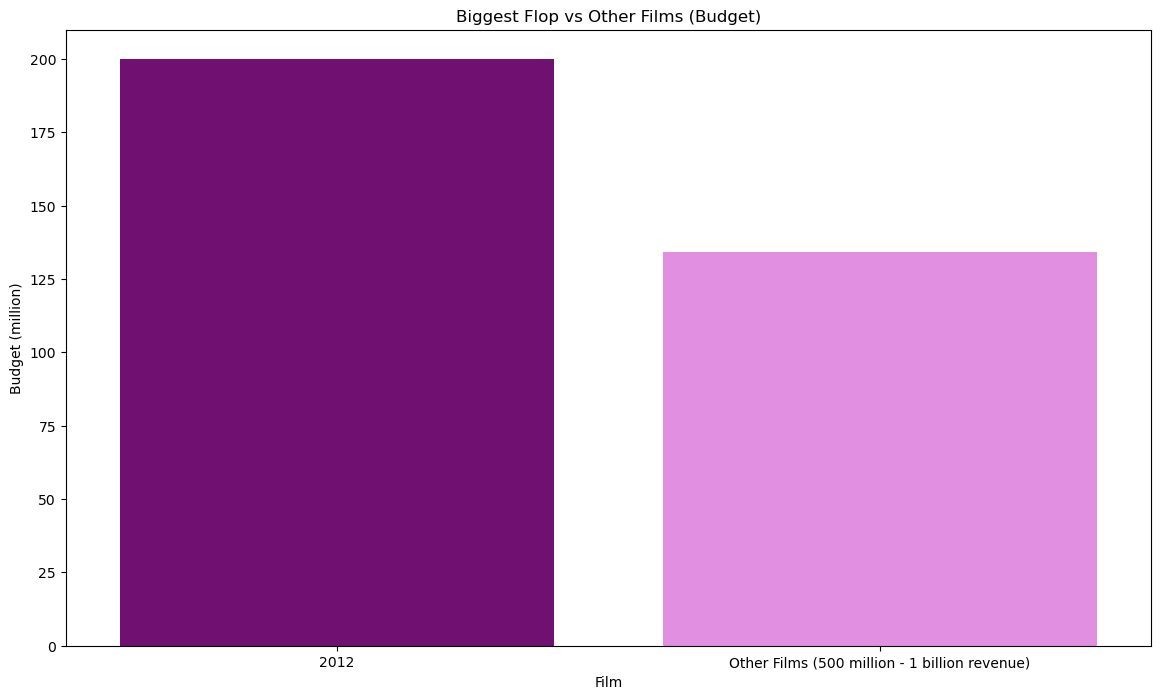

In [103]:
# Filtering films with a revenue between 500 million and 1 billion
other_films_df = df.query('500000000 <= revenue <= 1000000000')

# Creating a DataFrame for the barplot
plot_data = pd.DataFrame({
    'Film': ['2012', 'Other Films (500 million - 1 billion revenue)'],
    'Budget': [biggest_flop_film['budget'] / 1000000, other_films_df['budget'].mean() / 1000000]
})

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Film', y='Budget', data=plot_data, palette=['purple', 'violet'])
plt.title('Biggest Flop vs Other Films (Budget)')
plt.ylabel('Budget (million)')
plt.show()

### 2012 had a low rating as well as a significantly greater budget than other films that
### brought in similar revenues 